<a href="https://colab.research.google.com/github/elijkon/Hypothesis_tests/blob/main/hypothesis_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm, ttest_ind

In [ ]:
data_url = 'https://www.kaggle.com/datasets/khushikyad001/handwriting-and-personality-traits-dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/school classes/stat comp/handwriting_personality_large_dataset.csv')

In [ ]:
chosen_cols = ['Writing_Speed_wpm','Openness','Conscientiousness','Extraversion','Agreeableness','Neuroticism','Gender','Age']

In [ ]:
df = df[chosen_cols]

In [ ]:
df.head(100)

,Writing_Speed_wpm,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,Age
0,60,0.357203,0.407442,0.724947,0.451517,0.255107,Male,45
1,32,0.730250,0.051950,0.351615,0.528413,0.664159,Male,36
2,10,0.836987,0.162227,0.164681,0.816008,0.681870,Other,34
3,12,0.413419,0.363059,0.131564,0.938350,0.236702,Male,26
4,11,0.616046,0.247899,0.909740,0.698966,0.463774,Other,57
...,...,...,...,...,...,...,...,...
95,22,0.344975,0.196736,0.281125,0.884588,0.681993,Male,24
96,52,0.659996,0.464055,0.259674,0.637873,0.170423,Female,41
97,40,0.147428,0.024314,0.764463,0.455505,0.521954,Other,33
98,51,0.358443,0.562253,0.730982,0.878604,0.500425,Other,56


"The Handwriting & Personality Traits Dataset explores the relationship between handwriting characteristics and personality traits based on the Big Five Personality Model. It contains 2000 rows and 24 columns, including handwriting sample references, writing speed, personality trait scores, demographic information, and additional handwriting-related features." I have removed some of the columns and have only included the ones I need

Writing_Speed_wpm – Represents the writing speed of individuals in words per minute (wpm). The values range from 10 to 60, reflecting slow to fast handwriting speeds.

Openness – A personality trait score between 0 and 1, indicating an individual's level of creativity, curiosity, and openness to new experiences. Higher values suggest greater openness.

Conscientiousness – A score between 0 and 1 representing an individual's level of organization, discipline, and dependability. Higher values indicate a more conscientious personality.

Extraversion – A score between 0 and 1 that measures sociability, energy, and enthusiasm. Higher values suggest an extroverted nature, while lower values indicate introversion.

Agreeableness – A personality trait score (0 to 1) that reflects the degree of kindness, cooperation, and empathy. Higher values indicate a more agreeable personality.

Neuroticism – A score between 0 and 1 that measures emotional stability. Higher values indicate higher emotional instability, anxiety, or mood swings, whereas lower values suggest emotional resilience.

Gender – Represents the gender of the individual. The possible values are "Male", "Female", and "Other", allowing for gender inclusivity in the dataset.

Age – Indicates the age of individuals in the dataset, ranging from 18 to 60 years. This provides insights into whether handwriting and personality traits vary with age.

# Visualizations

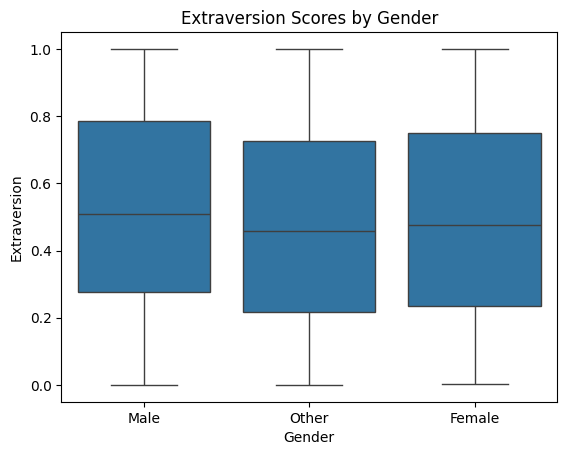

In [ ]:
sns.boxplot(x='Gender', y='Extraversion', data=df)
plt.title('Extraversion Scores by Gender')
plt.show()

This shows us that Males may be more extraverted but the IQR is very similar for both genders so there may be no difference

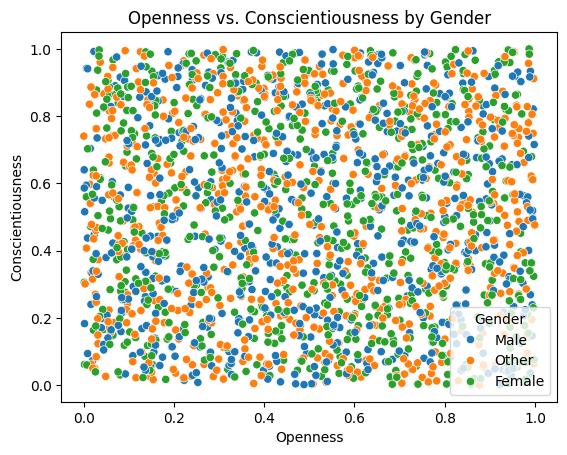

In [ ]:
sns.scatterplot(x='Openness', y='Conscientiousness', data=df, hue='Gender')
plt.title('Openness vs. Conscientiousness by Gender')
plt.show()

For this visualization I wanted to see if there are differences between openness and conscientiousness for males and females but it does not seem like it.

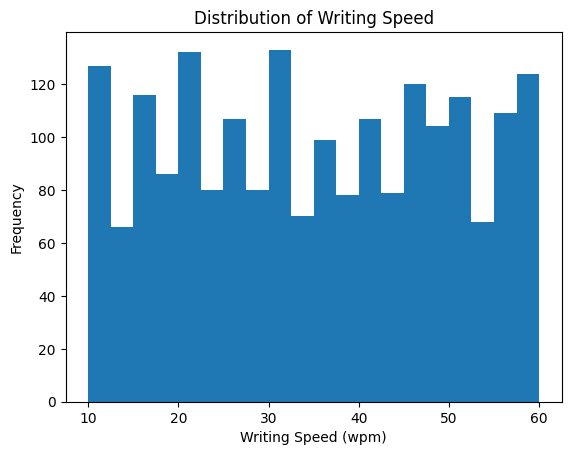

In [ ]:
plt.hist(df['Writing_Speed_wpm'], bins=20)
plt.xlabel('Writing Speed (wpm)')
plt.ylabel('Frequency')
plt.title('Distribution of Writing Speed')
plt.show()

For this visualization I wanted to see the variability of writting speed and it seems to be pretty spread. This also helps us understand the typical writing speed.

# Part 1: Chance Model
I want to see if males are more extraverted than females and others. I want my significance level to be 0.05.

Null Hypothesis: There is no difference in extraversion betweeen males and females/others.

Alternative Hypothesis: Males have higher extraversion scores than females and others.



In [ ]:
#test statistic
maleDF = df[df['Gender'] == 'Male']
othersDF = df[(df['Gender'] == 'Female') | (df['Gender'] == 'Other')]

avg_male_extraversion = maleDF['Extraversion'].mean()
avg_others_extraversion = othersDF['Extraversion'].mean()

obs_stat = avg_male_extraversion - avg_others_extraversion
print(f'My test stat or observed value is: {obs_stat}')

My test stat or observed value is: 0.0402492998612104


In [ ]:
#Simulate the test statistic under the Null Hypothesis
combined_scores = pd.concat([maleDF['Extraversion'], othersDF['Extraversion']])
mean_null = combined_scores.mean()
std_null = combined_scores.std()

n_male = len(maleDF)
n_others = len(othersDF)

simulated_diffs = []
for _ in range(10000):
    sim_male = norm.rvs(loc=mean_null, scale=std_null, size=n_male)
    sim_others = norm.rvs(loc=mean_null, scale=std_null, size=n_others)
    sim_diff = sim_male.mean() - sim_others.mean()
    simulated_diffs.append(sim_diff)

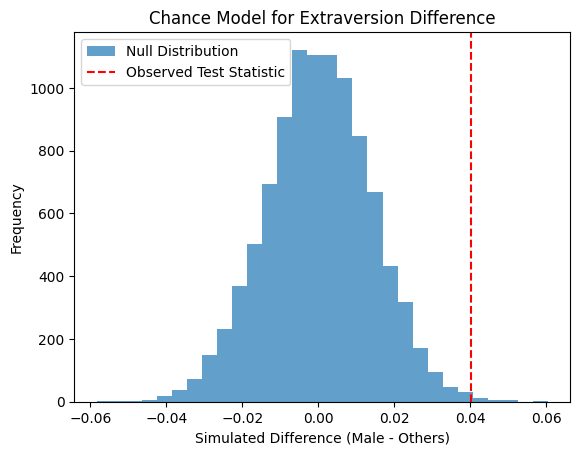

In [ ]:
#Create a histogram of test statistic values under the Null

plt.hist(simulated_diffs, bins=30, alpha=0.7, label='Null Distribution')
plt.axvline(x=obs_stat, color='red', linestyle='--', label='Observed Test Statistic')
plt.xlabel('Simulated Difference (Male - Others)')
plt.ylabel('Frequency')
plt.title('Chance Model for Extraversion Difference')
plt.legend()
plt.show()


In [ ]:
#P-value and conclusion
p_value = np.mean(np.array(simulated_diffs) >= obs_stat)

print(f"Observed Test Statistic: {obs_stat:.4f}")
print(f"P-value: {p_value:.4f}")


Observed Test Statistic: 0.0402
P-value: 0.0025


We have a p-value of 0.002 which is much smaller than the set significance value so we reject the null in favor of the alternative. This means that males have a higher extravertedness then other genders.

# Permutation Test
We want to know if the average age in the "Agreeable" group is significantly different than in the "Disagreeable" group. The significance level is 0.05.

Null Hyppothesis: The average age in the "Agreeable" group is the same as in the "Disagreeable" group.

Alternative Hypothesis: The average age in the "Agreeable" group is less than the average age in the "Disagreeable" group.

I am testing if Agreeable people are younger.

In [ ]:
df['Agreeableness_label'] = np.where(df['Agreeableness'] > 0.5, 'Agreeable', 'Disagreeable')
df.head(100)
#making agreeableness a categorical. This only works if you "run all" for some reason.

,Writing_Speed_wpm,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,Age,Agreeableness_label
0,60,0.357203,0.407442,0.724947,0.451517,0.255107,Male,45,Disagreeable
1,32,0.730250,0.051950,0.351615,0.528413,0.664159,Male,36,Agreeable
2,10,0.836987,0.162227,0.164681,0.816008,0.681870,Other,34,Agreeable
3,12,0.413419,0.363059,0.131564,0.938350,0.236702,Male,26,Agreeable
4,11,0.616046,0.247899,0.909740,0.698966,0.463774,Other,57,Agreeable
...,...,...,...,...,...,...,...,...,...
95,22,0.344975,0.196736,0.281125,0.884588,0.681993,Male,24,Agreeable
96,52,0.659996,0.464055,0.259674,0.637873,0.170423,Female,41,Agreeable
97,40,0.147428,0.024314,0.764463,0.455505,0.521954,Other,33,Disagreeable
98,51,0.358443,0.562253,0.730982,0.878604,0.500425,Other,56,Agreeable


In [ ]:
#Test Statistic
agree_df = df[df['Agreeableness_label']=='Agreeable']
avg_agree_age = agree_df['Age'].mean()
disagree_df = df[df['Agreeableness_label']=='Disagreeable']
avg_disagree_age = disagree_df['Age'].mean()

obs_stat = (avg_agree_age - avg_disagree_age)
obs_stat

np.float64(-0.24264017721029774)

In [ ]:
agreeableness_df = df[(df['Agreeableness_label'] == 'Agreeable') | (df['Agreeableness_label'] == 'Disagreeable')]

age_scores_europe = agreeableness_df['Age'].to_numpy()
likeable = agreeableness_df['Agreeableness_label'].to_numpy()

In [ ]:
#Simulate the test statistic under the Null Hypothesis using a permutation test
def simulate_test_stat(age_scores_europe1, likeable1):
    shuffled_regions = np.random.permutation(likeable)

    dis_scores = age_scores_europe1[shuffled_regions == 'Disagreeable']
    agree_scores = age_scores_europe1[shuffled_regions == 'Agreeable']

    avg_dis = np.mean(dis_scores)
    avg_agree = np.mean(agree_scores)

    sim_test_stat = avg_dis - avg_agree
    return sim_test_stat

In [ ]:
#simulate 10,000 test stats
simulated_stats = []

for i in range(10000):
    stat = simulate_test_stat(age_scores_europe, likeable)
    simulated_stats.append(stat)

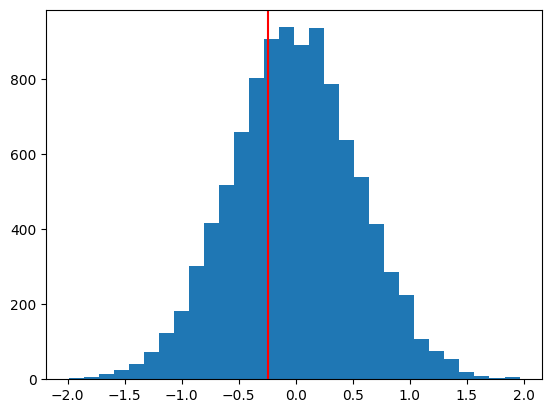

In [ ]:
#create a histogram
plt.hist(simulated_stats, bins=30)
plt.axvline(x=obs_stat,color='red')

In [ ]:
#conclusion
p_value = (simulated_stats >= obs_stat).mean()

print(f"P-value: {p_value}")

P-value: 0.6586


The p-value is greater than our set significance level which is 0.05. That means that we fail to reject the null in favor of the alternative. Which means the average age in the "Agreeable" group is the same as in the "Disagreeable" group.

# Bootstrap
We want to estimate the mean Neuroticism in males.
To do this we will bootstrap a 95% confidence interval.

Finally, we will ask if the mean Neuroticism of females falls inside the confidence region and is therefore similar to the Neurocitism of males or not.

Null Hypothesis: The mean Neuroticism in males is the same as the Neuroticismin mean in females.

Alternative Hypothesis: The mean Neuroticism in males is different from the mean Neuroticism in females.

In [ ]:
#test stat
maleDF = df[df['Gender']=='Male']
avg_n_male = maleDF['Neuroticism'].mean()
femaleDF = df[df['Gender']=='Female']
avg_n_female = femaleDF['Neuroticism'].mean()
print(f'Our observed value in this case is avg_n_female.')

Our observed value in this case is avg_n_female.


In [ ]:
def one_bootstrap_mean(sample_df):
  resample = sample_df.sample(n=len(sample_df), replace = True)
  bootstrapped_mean = np.average(resample['Neuroticism'])
  return bootstrapped_mean

In [ ]:
one_bootstrap_mean(maleDF)

np.float64(0.48357118698163837)

In [ ]:
num_rep = 10000
bootstrap_means = []
for i in range(num_rep):
  bootstrap_means.append(one_bootstrap_mean(maleDF))

In [ ]:
left = np.percentile(bootstrap_means, 2.5)
right = np.percentile(bootstrap_means, 97.5)
interval = np.array([left, right])
interval

array([0.46516361, 0.51169571])

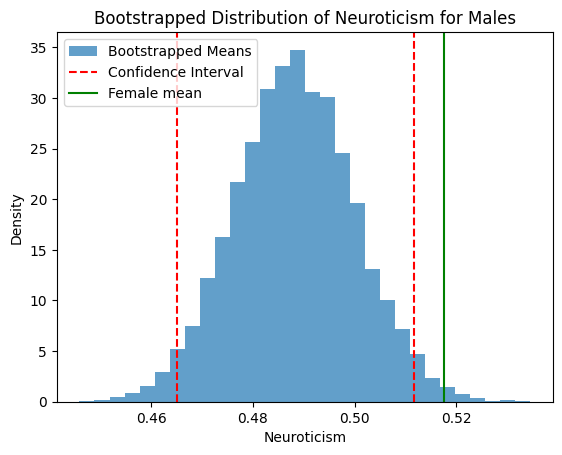

In [ ]:
plt.hist(bootstrap_means, bins=30, density=True, alpha=0.7, label="Bootstrapped Means")

plt.axvline(x=left, color='red', linestyle='--', label="Confidence Interval")
plt.axvline(x=right, color='red', linestyle='--')


plt.axvline(x=avg_n_female, color='green', label="Female mean")

plt.xlabel("Neuroticism")
plt.ylabel("Density")
plt.title("Bootstrapped Distribution of Neuroticism for Males")
plt.legend()

plt.show()

In [ ]:
bootstrap_array = np.array(bootstrap_means)

# Center the bootstrap around its mean
center = np.mean(bootstrap_array)

# Two-tailed p-value
p_value = np.mean(np.abs(bootstrap_array - center) >= np.abs(avg_n_female - center))

print(f"P-value: {p_value:.4f}")

P-value: 0.0133


To conclude we can see that the female mean falls outside of the male interval and the p-value also is less than 0.05 so we can say that we reject the null in favor of the alternative. This means that female and male Neuroticism is different.